In [1]:
from sklearn.cluster import DBSCAN

In [2]:
from sklearn.model_selection import GridSearchCV

In [3]:
import numpy as np

In [4]:
import pickle

In [5]:
from tqdm import tqdm

In [6]:
from sklearn.metrics import make_scorer, davies_bouldin_score

In [7]:
from sklearn.cluster import AgglomerativeClustering

In [10]:
from scipy.sparse import csr_matrix

In [14]:
# from sklearn.decomposition import PCA

In [ ]:
# from sklearn.random_projection import GaussianRandomProjection

In [19]:
from sklearn.decomposition import NMF

In [30]:
import matplotlib.pyplot as plt

I'll grab my reduced_data variable from the first modeling notebook

In [8]:
with open('reduced_data.pkl', 'rb') as f:
    reduced_data = pickle.load(f)

NMF can be tricky to hyperparameter tune, but I'll start with default

In [35]:
reduced_data.shape

(1048587, 2)

In [24]:
nmf = NMF()
NMF_data = nmf.fit(abs(reduced_data))

c:\users\ryanc\appdata\local\programs\python\python38\lib\site-packages\sklearn\decomposition\_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


In [28]:
# Get the topic matrix (H) and the feature matrix (W)
topic_matrix = nmf.components_
feature_matrix = nmf.transform(abs(reduced_data))

# Print the topic matrix and feature matrix
print(topic_matrix)
print(feature_matrix)

[[12.38824335  1.06161523]
 [ 0.          9.78829717]]
[[0.00620148 0.01003745]
 [0.007045   0.01250455]
 [0.00464758 0.00707109]
 ...
 [0.00945799 0.00812874]
 [0.00862706 0.00285819]
 [0.00329689 0.00086048]]


In [34]:
# Print the topic matrix and feature matrix
print(topic_matrix)
print('='*10)
print(topic_matrix.shape)

[[12.38824335  1.06161523]
 [ 0.          9.78829717]]
(2, 2)


In [33]:
# Print the topic matrix and feature matrix
# print(topic_matrix)
print(feature_matrix)
print('='*10)
print(feature_matrix.shape)

[[0.00620148 0.01003745]
 [0.007045   0.01250455]
 [0.00464758 0.00707109]
 ...
 [0.00945799 0.00812874]
 [0.00862706 0.00285819]
 [0.00329689 0.00086048]]
(1048587, 2)


In [36]:
# Topic-feature mapping
topic_features = np.argmax(feature_matrix, axis=0)
print("Topic-Feature Mapping:")
print(topic_features)

# Document analysis
document_topics = np.argmax(topic_matrix, axis=1)
print("Document Topics:")
print(document_topics)

Topic-Feature Mapping:
[334171 172748]
Document Topics:
[0 1]


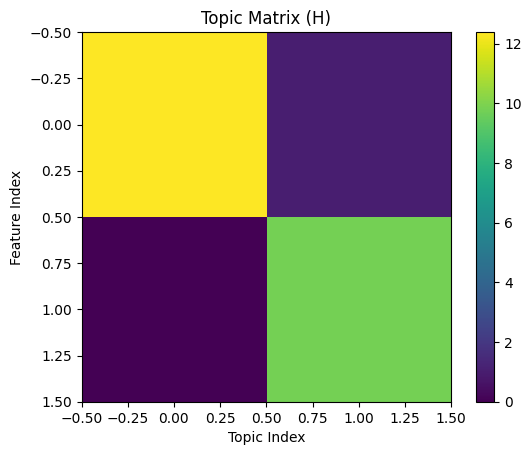

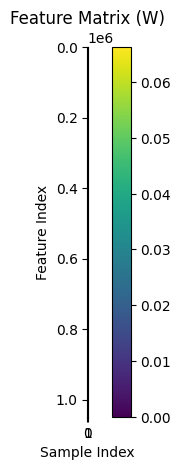

In [31]:
# Visualize topic matrix (H)
plt.imshow(topic_matrix, cmap='viridis', interpolation='nearest')
plt.title('Topic Matrix (H)')
plt.xlabel('Topic Index')
plt.ylabel('Feature Index')
plt.colorbar()
plt.show()

# Visualize feature matrix (W)
plt.imshow(feature_matrix, cmap='viridis', interpolation='nearest')
plt.title('Feature Matrix (W)')
plt.xlabel('Sample Index')
plt.ylabel('Feature Index')
plt.colorbar()
plt.show()

Something went wrong with my modeling. I only see 2 topics... unfortunately I have a bit of a time crunch, so I'll just stick with my clustering model for now...

# Testing different models scrap

Need to use CSR and Gaussian Random Projection because data is too big, but the numpy needs to be dense still.

In [18]:
# Convert reduced_data to CSR format
reduced_data_csr = csr_matrix(reduced_data)

# dense
reduced_data_dense = reduced_data_csr.toarray()

# Create a random projection object with the desired number of components
rp = GaussianRandomProjection(n_components=2)

# Fit and transform the data
reduced_data_rp = rp.fit_transform(reduced_data_dense)

# Define the hyperparameter tuning space
param_grid = {
    'n_clusters': [5, 10, 15],
    'affinity': ['euclidean'],
    'linkage': ['ward', 'complete']
}

# Perform grid search with nested cross-validation
grid_search = GridSearchCV(AgglomerativeClustering(), param_grid, cv=5, scoring=make_scorer(davies_bouldin_score))
grid_search.fit(reduced_data_rp)

# Print the best hyperparameters and score
print("Best hyperparameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

c:\users\ryanc\appdata\local\programs\python\python38\lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
c:\users\ryanc\appdata\local\programs\python\python38\lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
c:\users\ryanc\appdata\local\programs\python\python38\lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
c:\users\ryanc\appdata\local\programs\python\python38\lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
c:\users\ryanc\appdata\l

ValueError: 
All the 30 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "c:\users\ryanc\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py", line 727, in _fit_and_score
    estimator.fit(X_train, **fit_params)
  File "c:\users\ryanc\appdata\local\programs\python\python38\lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\users\ryanc\appdata\local\programs\python\python38\lib\site-packages\sklearn\cluster\_agglomerative.py", line 979, in fit
    return self._fit(X)
  File "c:\users\ryanc\appdata\local\programs\python\python38\lib\site-packages\sklearn\cluster\_agglomerative.py", line 1071, in _fit
    out = memory.cache(tree_builder)(
  File "c:\users\ryanc\appdata\local\programs\python\python38\lib\site-packages\joblib\memory.py", line 353, in __call__
    return self.func(*args, **kwargs)
  File "c:\users\ryanc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\_param_validation.py", line 187, in wrapper
    return func(*args, **kwargs)
  File "c:\users\ryanc\appdata\local\programs\python\python38\lib\site-packages\sklearn\cluster\_agglomerative.py", line 295, in ward_tree
    out = hierarchy.ward(X)
  File "c:\users\ryanc\appdata\local\programs\python\python38\lib\site-packages\scipy\cluster\hierarchy.py", line 834, in ward
    return linkage(y, method='ward', metric='euclidean')
  File "c:\users\ryanc\appdata\local\programs\python\python38\lib\site-packages\scipy\cluster\hierarchy.py", line 1060, in linkage
    y = distance.pdist(y, metric)
  File "c:\users\ryanc\appdata\local\programs\python\python38\lib\site-packages\scipy\spatial\distance.py", line 2242, in pdist
    return pdist_fn(X, out=out, **kwargs)
numpy.core._exceptions._ArrayMemoryError: Unable to allocate 2.56 TiB for an array with shape (351850180146,) and data type float64

--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "c:\users\ryanc\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py", line 727, in _fit_and_score
    estimator.fit(X_train, **fit_params)
  File "c:\users\ryanc\appdata\local\programs\python\python38\lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\users\ryanc\appdata\local\programs\python\python38\lib\site-packages\sklearn\cluster\_agglomerative.py", line 979, in fit
    return self._fit(X)
  File "c:\users\ryanc\appdata\local\programs\python\python38\lib\site-packages\sklearn\cluster\_agglomerative.py", line 1071, in _fit
    out = memory.cache(tree_builder)(
  File "c:\users\ryanc\appdata\local\programs\python\python38\lib\site-packages\joblib\memory.py", line 353, in __call__
    return self.func(*args, **kwargs)
  File "c:\users\ryanc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\_param_validation.py", line 187, in wrapper
    return func(*args, **kwargs)
  File "c:\users\ryanc\appdata\local\programs\python\python38\lib\site-packages\sklearn\cluster\_agglomerative.py", line 295, in ward_tree
    out = hierarchy.ward(X)
  File "c:\users\ryanc\appdata\local\programs\python\python38\lib\site-packages\scipy\cluster\hierarchy.py", line 834, in ward
    return linkage(y, method='ward', metric='euclidean')
  File "c:\users\ryanc\appdata\local\programs\python\python38\lib\site-packages\scipy\cluster\hierarchy.py", line 1060, in linkage
    y = distance.pdist(y, metric)
  File "c:\users\ryanc\appdata\local\programs\python\python38\lib\site-packages\scipy\spatial\distance.py", line 2242, in pdist
    return pdist_fn(X, out=out, **kwargs)
numpy.core._exceptions._ArrayMemoryError: Unable to allocate 2.56 TiB for an array with shape (351851019015,) and data type float64

--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "c:\users\ryanc\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py", line 727, in _fit_and_score
    estimator.fit(X_train, **fit_params)
  File "c:\users\ryanc\appdata\local\programs\python\python38\lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\users\ryanc\appdata\local\programs\python\python38\lib\site-packages\sklearn\cluster\_agglomerative.py", line 979, in fit
    return self._fit(X)
  File "c:\users\ryanc\appdata\local\programs\python\python38\lib\site-packages\sklearn\cluster\_agglomerative.py", line 1071, in _fit
    out = memory.cache(tree_builder)(
  File "c:\users\ryanc\appdata\local\programs\python\python38\lib\site-packages\joblib\memory.py", line 353, in __call__
    return self.func(*args, **kwargs)
  File "c:\users\ryanc\appdata\local\programs\python\python38\lib\site-packages\sklearn\cluster\_agglomerative.py", line 688, in _complete_linkage
    return linkage_tree(*args, **kwargs)
  File "c:\users\ryanc\appdata\local\programs\python\python38\lib\site-packages\sklearn\cluster\_agglomerative.py", line 567, in linkage_tree
    out = hierarchy.linkage(X, method=linkage, metric=affinity)
  File "c:\users\ryanc\appdata\local\programs\python\python38\lib\site-packages\scipy\cluster\hierarchy.py", line 1060, in linkage
    y = distance.pdist(y, metric)
  File "c:\users\ryanc\appdata\local\programs\python\python38\lib\site-packages\scipy\spatial\distance.py", line 2242, in pdist
    return pdist_fn(X, out=out, **kwargs)
numpy.core._exceptions._ArrayMemoryError: Unable to allocate 2.56 TiB for an array with shape (351850180146,) and data type float64

--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "c:\users\ryanc\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py", line 727, in _fit_and_score
    estimator.fit(X_train, **fit_params)
  File "c:\users\ryanc\appdata\local\programs\python\python38\lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\users\ryanc\appdata\local\programs\python\python38\lib\site-packages\sklearn\cluster\_agglomerative.py", line 979, in fit
    return self._fit(X)
  File "c:\users\ryanc\appdata\local\programs\python\python38\lib\site-packages\sklearn\cluster\_agglomerative.py", line 1071, in _fit
    out = memory.cache(tree_builder)(
  File "c:\users\ryanc\appdata\local\programs\python\python38\lib\site-packages\joblib\memory.py", line 353, in __call__
    return self.func(*args, **kwargs)
  File "c:\users\ryanc\appdata\local\programs\python\python38\lib\site-packages\sklearn\cluster\_agglomerative.py", line 688, in _complete_linkage
    return linkage_tree(*args, **kwargs)
  File "c:\users\ryanc\appdata\local\programs\python\python38\lib\site-packages\sklearn\cluster\_agglomerative.py", line 567, in linkage_tree
    out = hierarchy.linkage(X, method=linkage, metric=affinity)
  File "c:\users\ryanc\appdata\local\programs\python\python38\lib\site-packages\scipy\cluster\hierarchy.py", line 1060, in linkage
    y = distance.pdist(y, metric)
  File "c:\users\ryanc\appdata\local\programs\python\python38\lib\site-packages\scipy\spatial\distance.py", line 2242, in pdist
    return pdist_fn(X, out=out, **kwargs)
numpy.core._exceptions._ArrayMemoryError: Unable to allocate 2.56 TiB for an array with shape (351851019015,) and data type float64


In [9]:
# # Define the hyperparameter tuning space
# param_grid = {
#     'n_clusters': [5, 10, 15],
#     'affinity': ['euclidean', 'manhattan'],
#     'linkage': ['ward', 'complete']
# }

# # Perform grid search with nested cross-validation
# grid_search = GridSearchCV(AgglomerativeClustering(), param_grid, cv=5, scoring=make_scorer(davies_bouldin_score))
# grid_search.fit(reduced_data)

# # Print the best hyperparameters and score
# print("Best hyperparameters:", grid_search.best_params_)
# print("Best score:", grid_search.best_score_)